
# EDA, Correlation, Regression Analysis on Movies dataset

In this project, we do an end to end data analysis on the Movies dataset. The following tasks have been performed:

- The data was imported and read doing an initial feature analysis.
- The data was cleaned as required e.g. looking for null values, duplicate values, handling them, reduce redundancy in features etc.
- EDA was performed on the data with the help of visualisation.
- Correlation between the features was done and the important features on which the gross revenue of a movie is correlated was found out.
- Finally we chose the highly correlated feature values and trained and machine learning model to predict the revenue of a film given all other features.

### Reading the data

In [1]:


# First let's import the packages we will use in this project

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('ggplot')
# size configuration of the plots
plt.rcParams['figure.figsize'] = (12, 8)




In [2]:

# Lets read the data

df = pd.read_csv("movies.csv")
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# number of rows and columns
df.shape

(7668, 15)

In [4]:
# column features present
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [5]:
# lets get some column type information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB



### Data Cleaning

In [5]:
# getting the percentage of null values present

print("Percentage of null values\n")
print(df.isnull().sum()/df.shape[0]*100)

Percentage of null values

name         0.000000
rating       1.004173
genre        0.000000
year         0.000000
released     0.026082
score        0.039124
votes        0.039124
director     0.000000
writer       0.039124
star         0.013041
country      0.039124
budget      28.312467
gross        2.464789
company      0.221701
runtime      0.052165
dtype: float64


***Another elegant way of finding the null data percentage. Here the trick is in a boolean data array, the mean of the array is actually the percenatge of '1's present***

In [6]:
# using numpy for array operation

print("Percentage of null values\n")
print(np.mean(df.isnull())*100)


Percentage of null values

name         0.000000
rating       1.004173
genre        0.000000
year         0.000000
released     0.026082
score        0.039124
votes        0.039124
director     0.000000
writer       0.039124
star         0.013041
country      0.039124
budget      28.312467
gross        2.464789
company      0.221701
runtime      0.052165
dtype: float64


- **There are some null values in budget column. Lets see if we can replace them by the mean budget value.**<br>Though we need to check for outliers if any in the budget data.


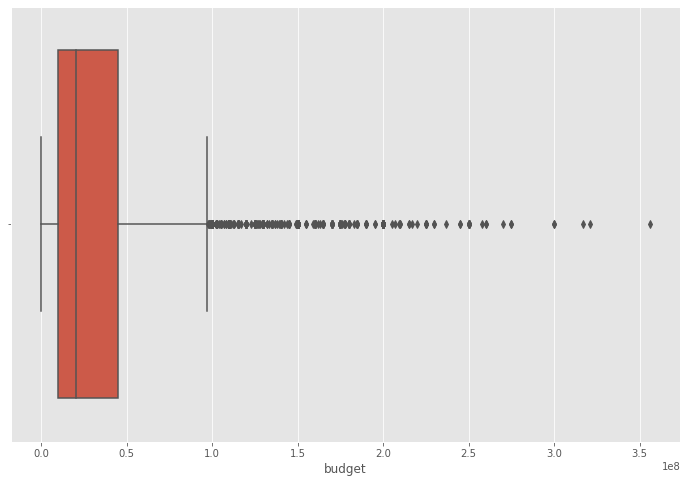

In [7]:
# checking outliers in 'budget'

sns.boxplot(df['budget'], data=df)
plt.show()


<br>*As we can see there are many outliers. So the missing data cannot be imputed by mean value.*<br>
**It is better to drop those rows where missing values are present**<br><br>


In [8]:
#removing the rows with missing values

df.dropna(inplace=True)


Lets look for duplicate entries now

In [9]:
print(df[df.duplicated(keep=False)])


Empty DataFrame
Columns: [name, rating, genre, year, released, score, votes, director, writer, star, country, budget, gross, company, runtime]
Index: []


- *There are no two rows with complete duplicate values in all fields*<br>**Though two movies can have same name, lets check for such movies**

In [10]:
df[df.duplicated(subset = 'name', keep=False)].sort_values(by ='name').head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5712,A Nightmare on Elm Street,R,Crime,2010,"April 30, 2010 (United States)",5.2,95000.0,Samuel Bayer,Wesley Strick,Jackie Earle Haley,United States,35000000.0,1.156952e+08,New Line Cinema,95.0
483,A Nightmare on Elm Street,R,Horror,1984,"November 16, 1984 (United States)",7.5,212000.0,Wes Craven,Wes Craven,Heather Langenkamp,United States,1800000.0,2.550714e+07,New Line Cinema,91.0
7481,Aladdin,PG,Adventure,2019,"May 24, 2019 (United States)",6.9,239000.0,Guy Ritchie,John August,Will Smith,United Kingdom,183000000.0,1.050694e+09,Walt Disney Pictures,128.0
2056,Aladdin,G,Animation,1992,"November 25, 1992 (United States)",8.0,382000.0,Ron Clements,Ron Clements,Scott Weinger,United States,28000000.0,5.040502e+08,Walt Disney Pictures,90.0
3196,Anna Karenina,PG-13,Drama,1997,"April 4, 1997 (United States)",6.3,5600.0,Bernard Rose,Lev Tolstoy,Sophie Marceau,United States,35000000.0,8.585530e+05,Icon Entertainment International,108.0


***After little investigation, we can see that the duplicates in this column are actually either remakes or simply homonyms. Therefore, we will not exclude any.***<br><br>

<br>***We will perform some more data cleaning now:***

- Adjust the data types of budget, gross and votes to integer
- Split the released column into released_year and released_country. 
- Drop the released column. Insert the released_date year as the year column.
- Rename the 'not rated' values in the rating column to simply 'unrated' (which is also a label), to reduce redundancy.



In [11]:
# Adjusting the datatype of budget, gross, votes to int

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')


In [12]:
# Splitting the 'released' column intp 'released_date' and 'released_country'

df['released_year']= pd.to_datetime(df['released'].str.split('(', expand=True)[0]).dt.year

df['released_country']= df['released'].str.split('(', expand=True)[1].str.replace(r'[^a-zA-Z\d\s:]', '')


In [47]:
# dropping 'year' column

df=df.drop('year', axis = 1)

In [13]:
# Renaming Not Rated to Unrated

df['rating']= df['rating'].replace('Not Rated', 'Unrated')

In [14]:
# dropping 'released' column

df=df.drop('released', axis = 1)



### Exploratory Data Analysis
Before moving further into the actual analysis, let's explore the dataset through some visualizations.

**1) What are the top 5 movies by gross revenue?<br>
2) What are the stars that made the most movies in this period of time? And the directors?<br>
3) What are the directors that have generated the most revenue?<br>
4) What is the volume of movies coming out per year?<br>
5) What are the best movies by score?<br>**



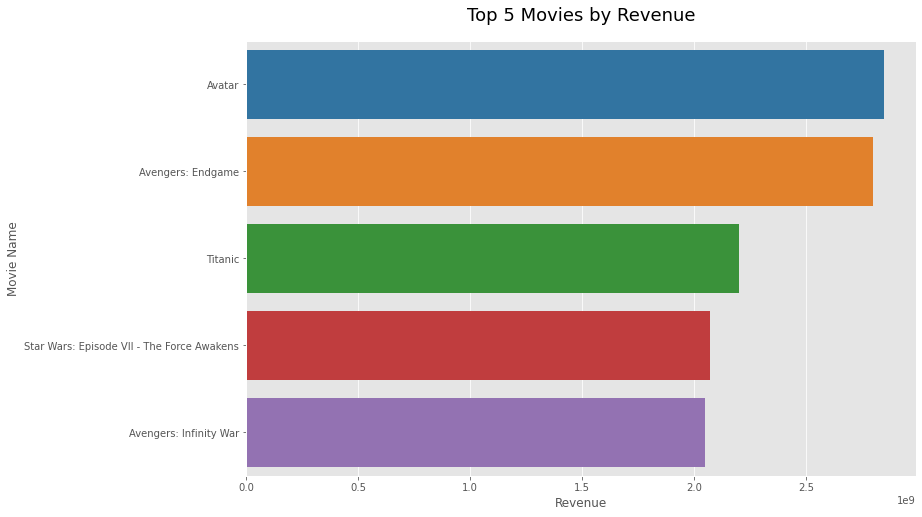

In [101]:
# What are the top 5 movies by gross revenue? 

top5 = df.sort_values(by='gross', ascending=False).head(5)
sns.barplot(y='name', x='gross', data=top5, palette='tab10')
plt.xlabel('Revenue')
plt.ylabel('Movie Name')
plt.title('Top 5 Movies by Revenue', fontsize=18, pad=20)
plt.show()

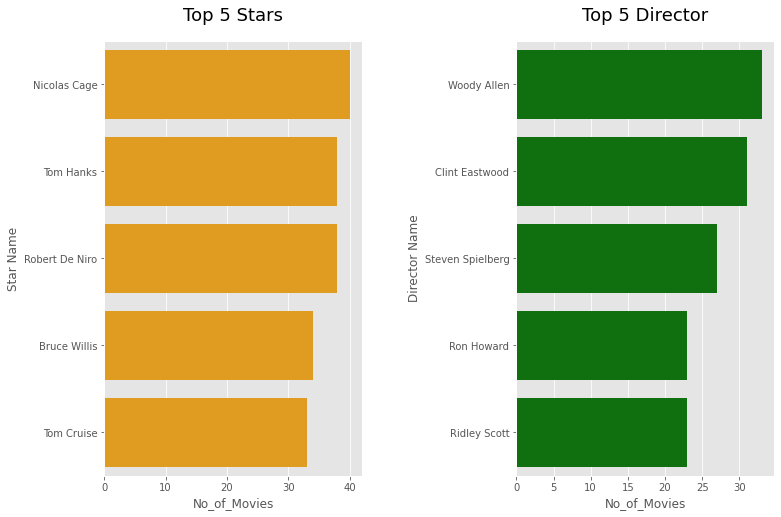

In [155]:
# What are the stars that made the most movies in this period of time? And the directors?

star = df.groupby('star')['name'].count().reset_index().sort_values(by='name', ascending=False).head(5)
director = df.groupby('director')['name'].count().reset_index().sort_values(by='name',ascending=False).head(5)

plt.subplot(1,2,1)
sns.barplot( x='name', y='star', data=star, color = 'orange')
plt.xlabel('No_of_Movies')
plt.ylabel('Star Name')
plt.title('Top 5 Stars', fontsize=18, pad=20)

plt.subplot(1,2,2)
sns.barplot( x='name', y='director', data=director, color = 'green')
plt.xlabel('No_of_Movies')
plt.ylabel('Director Name')
plt.title('Top 5 Director', fontsize=18, pad=20)

plt.subplots_adjust(wspace=0.6)
plt.show()

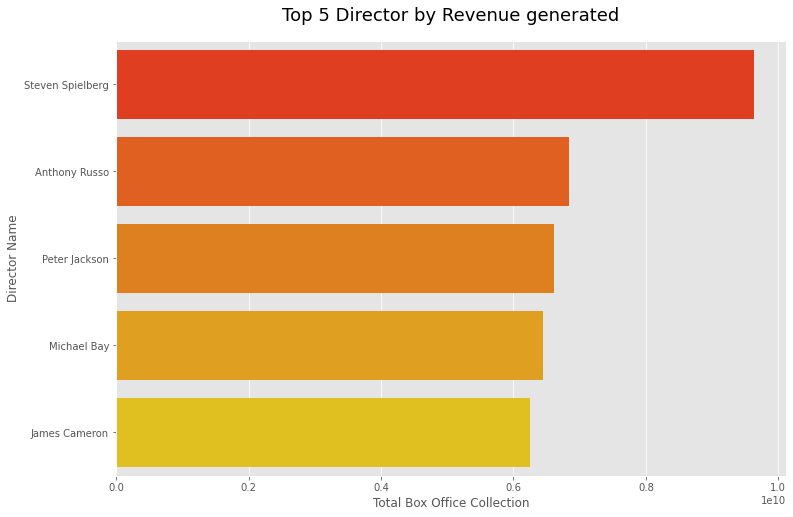

In [161]:
# What are the directors that have generated the most revenue?

director = df.groupby('director')['gross'].sum().reset_index().sort_values(by='gross',ascending=False).head(5)
sns.barplot( x='gross', y='director', data=director, palette = 'autumn')
plt.xlabel('Total Box Office Collection')
plt.ylabel('Director Name')
plt.title('Top 5 Director by Revenue generated', fontsize=18, pad=20)
plt.show()

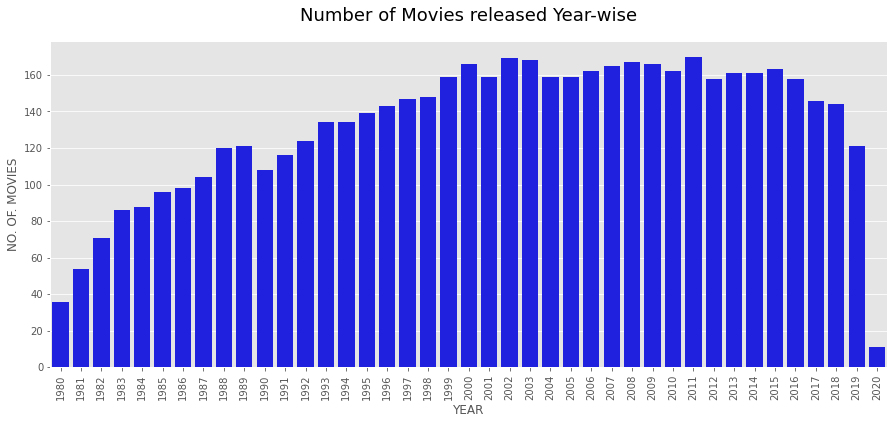

In [179]:
# What is the volume of movies coming out per year?

movies_count = pd.DataFrame({'movies_count':df.groupby('released_year')['name'].count()}).reset_index()

plt.figure(figsize=(15,6))
sns.barplot( x='released_year', y='movies_count', data=movies_count, color = 'blue')
plt.xlabel('YEAR')
plt.ylabel('NO. OF. MOVIES')
plt.xticks(rotation = 90)
plt.title('Number of Movies released Year-wise', fontsize=18, pad=20)
plt.show()


In 2020, we obviously had the surge of the Covid-19 pandemic, which clearly impacted the movie industry, as the previous graph denotes. Let's briefly see its impact on revenue.

In [188]:
revenue_year = df.groupby('released_year')['gross'].sum()
revenue_year_pct = revenue_year.pct_change()
df_year = pd.DataFrame({'Yearly Revenue':revenue_year, 'Perecent Change':revenue_year_pct})
df_year[-10:]

,Yearly Revenue,Perecent Change
released_year,,
2011,23527825436,0.071480
2012,25412067550,0.080086
2013,25666428951,0.010009
2014,24852833034,-0.031699
2015,27305403552,0.098684
2016,27036473906,-0.009849
2017,28750488079,0.063396
2018,28009036751,-0.025789
2019,27442787346,-0.020217


It is clear that throughout the last decade, the revenue, in average, was notably stable, even with a few peaks (e.g. 2015, year in which we had ***Star Wars VII, Jurassic World, Avengers: Age of Ultron,*** etc). But in 2020, cinemas and studios shut down, the industry's revenue fell by ~89%.

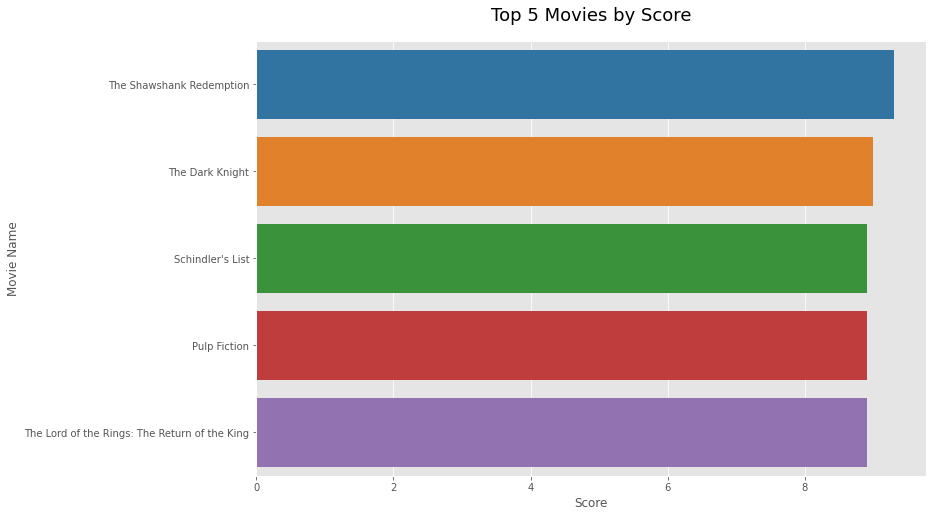

In [177]:
# What are the best movies by score?

top5 = df.sort_values(by='score', ascending=False).head(5)
sns.barplot(y='name', x='score', data=top5, palette='tab10')
plt.xlabel('Score')
plt.ylabel('Movie Name')
plt.title('Top 5 Movies by Score', fontsize=18, pad=20)


plt.show()


### Correlation Analysis

*The idea is to identify and investigate the features that are most highly correlated to gross revenue.*

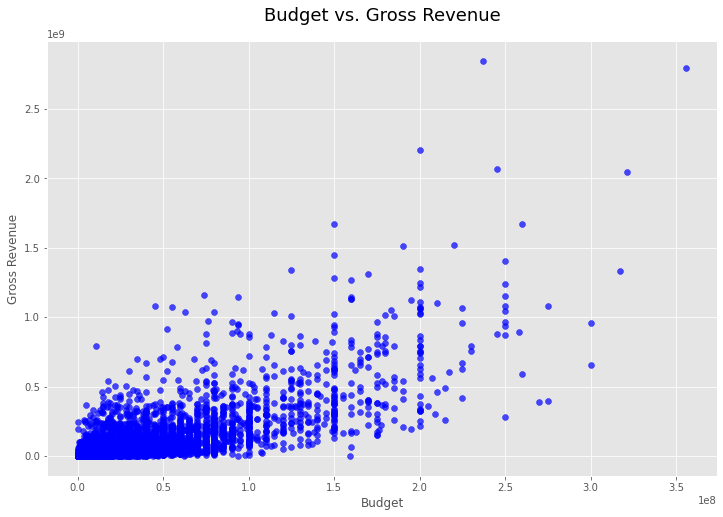

In [15]:
# Scatterplot of Budget and Gross

plt.scatter(x=df['budget'], y=df['gross'], color='b', alpha=.7)
plt.title('Budget vs. Gross Revenue', fontsize=18, pad=20)
plt.xlabel('Budget')
plt.ylabel('Gross Revenue')
plt.show()


*It looks like higher budget films tend to procure more gross revenue, though some exceptions are there*

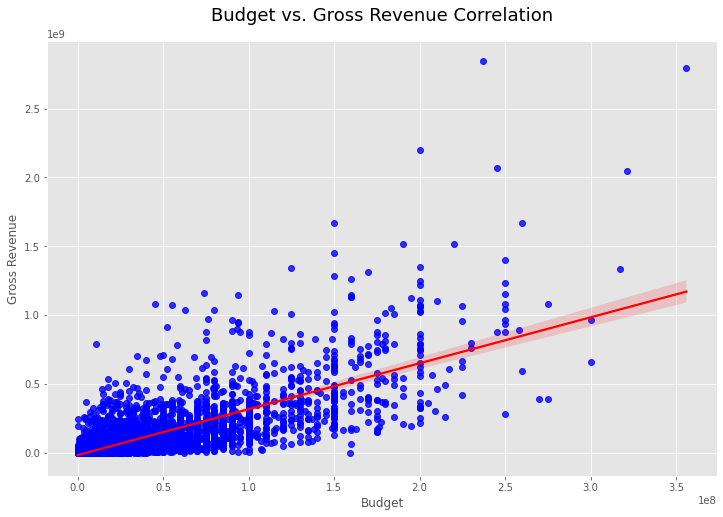

In [18]:
# regplot for a linear reg line

sns.regplot(data=df, x='budget', y='gross', color='b', line_kws={'color':'r'})
plt.title('Budget vs. Gross Revenue Correlation', fontsize=18, pad=20)
plt.xlabel('Budget')
plt.ylabel('Gross Revenue')
plt.show()


***Doing the linear regression plot shows a quite good linear correlation, though we cant estimate the exact number***


<br><br>
#### Correlation Matrix between all numeric columns

In [48]:
# Correlation Matrix between all numeric columns

df.corr(method ='pearson')

,score,votes,budget,gross,runtime,released_year
score,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
released_year,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


In [49]:
df.corr(method ='kendall')

,score,votes,budget,gross,runtime,released_year
score,1.000000,0.350185,-0.006406,0.124943,0.292254,0.043400
votes,0.350185,1.000000,0.346274,0.553625,0.205344,0.293044
budget,-0.006406,0.346274,1.000000,0.512057,0.231278,0.213719
gross,0.124943,0.553625,0.512057,1.000000,0.176979,0.232372
runtime,0.292254,0.205344,0.231278,0.176979,1.000000,0.064793
released_year,0.043400,0.293044,0.213719,0.232372,0.064793,1.000000


In [50]:

df.corr(method ='spearman')


,score,votes,budget,gross,runtime,released_year
score,1.000000,0.495409,-0.009971,0.183192,0.412155,0.063674
votes,0.495409,1.000000,0.493461,0.745793,0.300621,0.422988
budget,-0.009971,0.493461,1.000000,0.692958,0.330794,0.302535
gross,0.183192,0.745793,0.692958,1.000000,0.257400,0.340529
runtime,0.412155,0.300621,0.330794,0.257400,1.000000,0.095507
released_year,0.063674,0.422988,0.302535,0.340529,0.095507,1.000000


- ***Lets stick to Pearson method in this study***

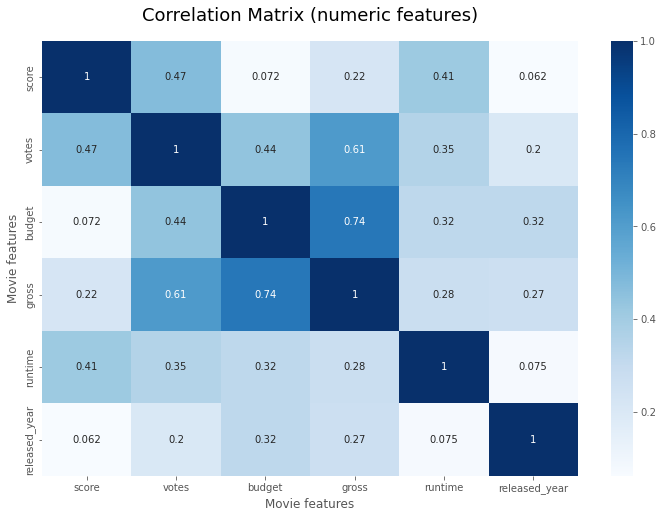

In [51]:
# Lets see a heatmap of the correlation matrix

sns.heatmap(df.corr(method='pearson'), annot=True, cmap='Blues')
plt.title('Correlation Matrix (numeric features)', fontsize=18, pad=20)
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()



<br><br>***Dealing with the categorical variables***

The following encodes the unique values of every categorical feature into numeric encoding, so that they can be used for correlation analysis.


In [53]:
from sklearn.preprocessing import LabelEncoder

df_cat = df.copy()

le = LabelEncoder()
var_mod = df.select_dtypes(include='object').columns
for i in var_mod:
    df_cat[i] = le.fit_transform(df[i])

In [54]:
df_cat.head()

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year,released_country
0,4692,5,6,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146.0,1980,47
1,3929,5,1,5.8,65000,1578,1158,214,47,4500000,58853106,452,104.0,1980,47
2,3641,3,0,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124.0,1980,47
3,204,3,4,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88.0,1980,47
4,732,5,4,7.3,108000,719,351,271,47,6000000,39846344,1083,98.0,1980,47


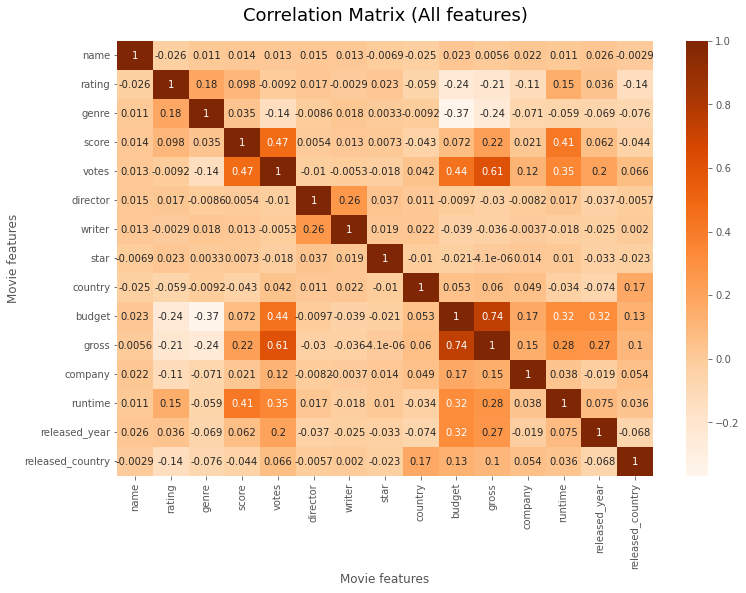

In [55]:
# Lets see a heatmap of the correlation matrix

sns.heatmap(df_cat.corr(method='pearson'), annot=True, cmap='Oranges')
plt.title('Correlation Matrix (All features)', fontsize=18, pad=20)
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()


In [56]:
# Lets look at the correlation value pairs with high values

corr_pairs = df_cat.corr(method='pearson').unstack().sort_values(ascending = False)
corr_pairs[(corr_pairs >0.3) & (corr_pairs != 1)]

budget         gross            0.740247
gross          budget           0.740247
               votes            0.614751
votes          gross            0.614751
score          votes            0.474256
votes          score            0.474256
               budget           0.439675
budget         votes            0.439675
score          runtime          0.414068
runtime        score            0.414068
votes          runtime          0.352303
runtime        votes            0.352303
budget         released_year    0.320312
released_year  budget           0.320312
budget         runtime          0.318695
runtime        budget           0.318695
dtype: float64

In [57]:
# correlation pairs with 'gross'

corr_pairs['gross']

gross               1.000000
budget              0.740247
votes               0.614751
runtime             0.275796
released_year       0.268721
score               0.222556
company             0.149553
released_country    0.100029
country             0.060078
name                0.005639
star               -0.000004
director           -0.029560
writer             -0.035885
rating             -0.206777
genre              -0.244101
dtype: float64

#### Insights

- Through this analysis, we can clearly see that variables like company, director, star, and country where a movie is released have little correlation with the actual gross revenue. 

- Whereas budget and the votes a movie gets seems to have greater impact in its gross earnings.

- Another interesting point is that the year of release tends to influentiate its budget. It is obvious that the movie industry has only gotten bigger year after year, so it is only natural that the average budget increases and, with that, the revenue. 

- Runtime also shows some correlation with the budget, as longer films tend to cost higher to be produced.

- That does not necessarily reflect the movie industry in its entirely, but surely allows for a deeper look into what tends to drive up revenues in the industry - and what does not.


### Regression Analysis

The goal of this section is to build a model that, given certain features (independent variables), could predict the gross revenue of a movie (dependent variable). For that, I will:
1) Select the features to be used in the model<br>
2) Split between training and test sets<br>
3) Scale numerical variables<br>
4) Evaluate the model and predict on test and sample data<br>

In [62]:
# Importing libraries for machine learning

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression


In [61]:
# The features I am going to use are those that have shown some correlation 
# to the gross revenue, either negative or positive

corr_pairs['gross'][abs(corr_pairs['gross'])> 0.2]


gross            1.000000
budget           0.740247
votes            0.614751
runtime          0.275796
released_year    0.268721
score            0.222556
rating          -0.206777
genre           -0.244101
dtype: float64

- ***Our feature selection is done:- 'budget', 'votes', 'runtime', 'released_year', 'score', 'rating', 'genre'.***

In [77]:
# Selecting the features with high correlation

X = df[['budget', 'votes', 'runtime', 'released_year', 'score',  'rating', 'genre']]
y = df['gross']

# Encoding the categorical features

le = LabelEncoder()
var_mod = X.select_dtypes(include='object').columns
for i in var_mod:
    X[i] = le.fit_transform(X[i])
   
    
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [78]:
X_train.head()

,budget,votes,runtime,released_year,score,rating,genre
6548,48000000,183000,108.0,2015,6.0,4,0
7285,22000000,127000,96.0,2018,5.3,5,9
2474,18000000,168000,127.0,1994,7.8,5,3
6218,7395080,40000,140.0,2012,7.2,7,5
1128,18000000,10000,108.0,1987,6.1,3,4


In [79]:
y_train.head()

6548    326479141
7285    365551694
2474      5887457
6218      5277766
1128     21589395
Name: gross, dtype: int64

In [80]:
# Scale the independent variables

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [91]:
# Build the model and draw predictions

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rsqrt = metrics.r2_score(y_test, y_pred)

print('MAE: {} \nMSE: {} \nRMSE: {} \nR-squared: {}'.format(mae, mse, rmse, rsqrt))

MAE: 57675053.56241099 
MSE: 1.1555244055502452e+16 
RMSE: 107495321.08655916 
R-squared: 0.6795200074473404


- **With only these features, the model is quite good with R2 Score of ~0.70**

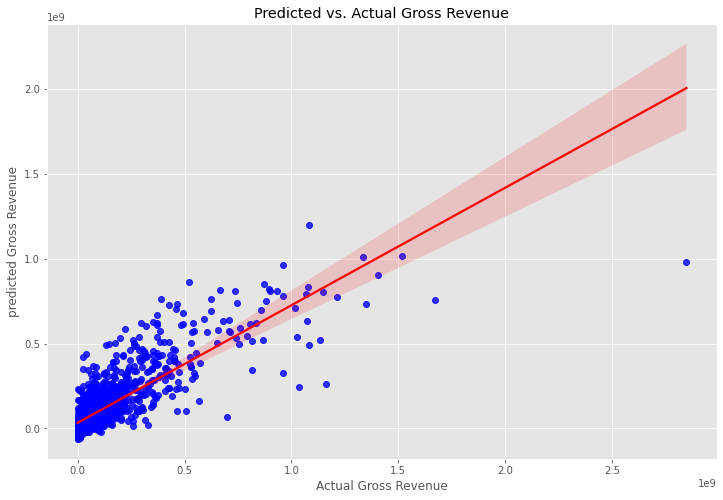

In [90]:
# Plotting actual values of gross revenue and predicted values

ax = sns.regplot(x=y_test, y=y_pred, scatter_kws={'color': 'blue'}, line_kws={'color':'red'})
ax.set(xlabel='Actual Gross Revenue', ylabel='predicted Gross Revenue')
ax.set(title='Predicted vs. Actual Gross Revenue')
plt.show()


<AxesSubplot:>

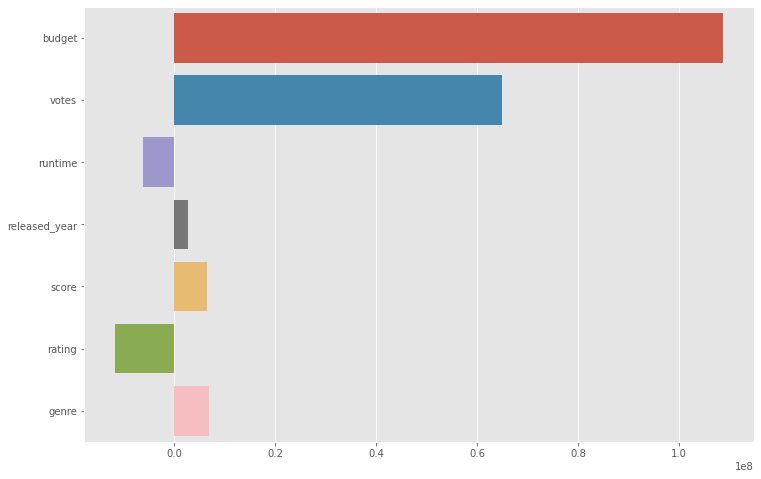

In [93]:
# Barplot for coefficients

sns.barplot(linreg.coef_, X.columns)

***We can see the feature importance of the model tallies with our feature correlation in first place***